## Loading Data

In [133]:
import pandas as pd

csv_path_train = "../../data/breast-cancer-diagnostic.shuf.lrn.csv"
csv_path_test = "../../data/breast-cancer-diagnostic.shuf.tes.csv"

df_train = pd.read_csv(csv_path_train)
df_train.head()


,ID,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,8813129,False,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.024560,...,15.14,23.60,98.84,708.8,0.1276,0.1311,0.17860,0.09678,0.2506,0.07623
1,898678,False,12.06,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,...,13.64,27.06,86.54,562.6,0.1289,0.1352,0.04506,0.05093,0.2880,0.08083
2,917896,False,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.037830,...,15.11,25.63,99.43,701.9,0.1425,0.2566,0.19350,0.12840,0.2849,0.09031
3,869691,True,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.074150,...,13.74,26.38,91.93,591.7,0.1385,0.4092,0.45040,0.18650,0.5774,0.10300
4,9110127,True,18.03,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.062540,...,20.38,22.02,133.30,1292.0,0.1263,0.2666,0.42900,0.15350,0.2842,0.08225


In [134]:
df_test = pd.read_csv(csv_path_test)
df_test.head()

,ID,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,884437,10.480,19.86,66.72,337.7,0.10700,0.05971,0.04831,0.03070,0.1737,...,11.48,29.46,73.68,402.8,0.15150,0.1026,0.1181,0.06736,0.2883,0.07748
1,901011,11.140,14.07,71.24,384.6,0.07274,0.06064,0.04505,0.01471,0.1690,...,12.12,15.82,79.62,453.5,0.08864,0.1256,0.1201,0.03922,0.2576,0.07018
2,865432,14.500,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,0.1856,...,15.70,15.98,102.80,745.5,0.13130,0.1788,0.2560,0.12210,0.2889,0.08006
3,894329,9.042,18.90,60.07,244.5,0.09968,0.19720,0.19750,0.04908,0.2330,...,10.06,23.40,68.62,297.1,0.12210,0.3748,0.4609,0.11450,0.3135,0.10550
4,84348301,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300


## Preprocessing 

Checking missing values

In [135]:
missing_counts = df_train.isna().sum()
print("Total missing values train:", int(missing_counts.sum()))

missing_counts = df_test.isna().sum()
print("Total missing values test:", int(missing_counts.sum()))

Total missing values train: 0
Total missing values test: 0


Encoding class to false = 0 and true = 1

In [136]:
col = df_train['class']
   
mapping = {True: 1, False: 0, 'true': 1, 'false': 0, 'True': 1, 'False': 0, 1: 1, 0: 0}
df_train['class'] = col.map(mapping)

df_train.head()

,ID,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,8813129,0,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.024560,...,15.14,23.60,98.84,708.8,0.1276,0.1311,0.17860,0.09678,0.2506,0.07623
1,898678,0,12.06,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,...,13.64,27.06,86.54,562.6,0.1289,0.1352,0.04506,0.05093,0.2880,0.08083
2,917896,0,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.037830,...,15.11,25.63,99.43,701.9,0.1425,0.2566,0.19350,0.12840,0.2849,0.09031
3,869691,1,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.074150,...,13.74,26.38,91.93,591.7,0.1385,0.4092,0.45040,0.18650,0.5774,0.10300
4,9110127,1,18.03,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.062540,...,20.38,22.02,133.30,1292.0,0.1263,0.2666,0.42900,0.15350,0.2842,0.08225


Checking data types and summary statistics

In [137]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       285 non-null    int64  
 1   class                    285 non-null    int64  
 2   radiusMean               285 non-null    float64
 3    textureMean             285 non-null    float64
 4    perimeterMean           285 non-null    float64
 5    areaMean                285 non-null    float64
 6    smoothnessMean          285 non-null    float64
 7    compactnessMean         285 non-null    float64
 8    concavityMean           285 non-null    float64
 9    concavePointsMean       285 non-null    float64
 10   symmetryMean            285 non-null    float64
 11   fractalDimensionMean    285 non-null    float64
 12   radiusStdErr            285 non-null    float64
 13   textureStdErr           285 non-null    float64
 14   perimeterStdErr         2

Checking statistical information

In [138]:
display(df_train.describe())
display(df_test.describe())

,ID,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
count,2.850000e+02,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,...,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,2.861498e+07,0.378947,14.068674,19.116211,91.555053,649.617895,0.095851,0.102605,0.085587,0.047930,...,16.214354,25.568737,106.866175,878.226316,0.131940,0.251042,0.263251,0.113729,0.291636,0.083341
std,1.204247e+08,0.485978,3.486377,4.516754,24.028687,343.979266,0.013894,0.051422,0.075717,0.037409,...,4.820742,6.318778,33.390308,572.257246,0.022377,0.153795,0.199783,0.067461,0.062957,0.016335
min,8.670000e+03,0.000000,6.981000,10.380000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.490000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.160300,0.058430
25%,8.711490e+05,0.000000,11.690000,15.900000,74.680000,418.700000,0.086000,0.062190,0.026880,0.020690,...,13.010000,20.720000,84.160000,515.300000,0.116600,0.141500,0.111700,0.064130,0.250600,0.071910
50%,9.065390e+05,0.000000,13.280000,18.700000,86.100000,546.400000,0.095140,0.092280,0.061950,0.033260,...,14.970000,25.410000,97.820000,684.500000,0.131200,0.215800,0.217700,0.099750,0.284100,0.079570
75%,8.811523e+06,1.000000,16.070000,21.840000,105.800000,797.800000,0.105100,0.130400,0.122600,0.073400,...,19.070000,30.280000,126.300000,1124.000000,0.144000,0.323500,0.382900,0.162800,0.319800,0.090750
max,9.113205e+08,1.000000,27.420000,39.280000,186.900000,2501.000000,0.163400,0.345400,0.410800,0.168900,...,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,0.901900,0.290300,0.577400,0.143100


,ID,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
count,2.840000e+02,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,...,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,3.213487e+07,14.186116,19.463697,92.384472,660.178873,0.096871,0.106083,0.092023,0.049912,0.179410,...,16.324218,25.786092,107.657641,882.948239,0.132799,0.257500,0.281158,0.115486,0.288510,0.084553
std,1.296579e+08,3.566637,4.073659,24.602640,360.231082,0.014239,0.054207,0.083554,0.040194,0.026097,...,4.853638,5.977303,33.868485,567.431913,0.023312,0.161019,0.217118,0.064058,0.060825,0.019652
min,8.915000e+03,7.691000,9.710000,48.340000,170.400000,0.064290,0.026500,0.000000,0.000000,0.106000,...,8.678000,12.020000,54.490000,223.600000,0.084090,0.043270,0.000000,0.000000,0.156500,0.055040
25%,8.654298e+05,11.747500,16.570000,75.655000,422.300000,0.086602,0.066915,0.030435,0.020245,0.161875,...,13.017500,21.422500,84.035000,515.425000,0.116075,0.150675,0.117750,0.064988,0.249700,0.071412
50%,9.057905e+05,13.415000,18.900000,86.680000,551.750000,0.096480,0.093540,0.060705,0.033850,0.176300,...,14.935000,25.360000,97.490000,687.050000,0.131500,0.211750,0.232000,0.102750,0.279100,0.080230
75%,8.911290e+06,15.622500,21.735000,103.450000,762.325000,0.105525,0.130425,0.132775,0.074010,0.193100,...,18.300000,29.437500,123.650000,1013.000000,0.148300,0.341600,0.381075,0.160850,0.316425,0.093122
max,9.113205e+08,28.110000,32.470000,188.500000,2499.000000,0.144700,0.311400,0.426800,0.201200,0.265500,...,33.130000,47.160000,229.300000,3432.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Checking class distribution

In [139]:
df_train["class"].value_counts(), df_train["class"].value_counts(normalize=True)

(class
 0    177
 1    108
 Name: count, dtype: int64,
 class
 0    0.621053
 1    0.378947
 Name: proportion, dtype: float64)

Checking numerical vs categorical columns

In [140]:
numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_train.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['ID', 'class', 'radiusMean', ' textureMean', ' perimeterMean', ' areaMean', ' smoothnessMean', ' compactnessMean', ' concavityMean', ' concavePointsMean', ' symmetryMean', ' fractalDimensionMean', ' radiusStdErr', ' textureStdErr', ' perimeterStdErr', ' areaStdErr', ' smoothnessStdErr', ' compactnessStdErr', ' concavityStdErr', ' concavePointsStdErr', ' symmetryStdErr', ' fractalDimensionStdErr', ' radiusWorst', ' textureWorst', ' perimeterWorst', ' areaWorst', ' smoothnessWorst', ' compactnessWorst', ' concavityWorst', ' concavePointsWorst', ' symmetryWorst', ' fractalDimensionWorst']
Categorical columns: []


Stripping whitespace

In [141]:
df_train.columns = df_train.columns.str.strip()
df_test.columns = df_test.columns.str.strip()

Checking distributions and skewness of data with histograms

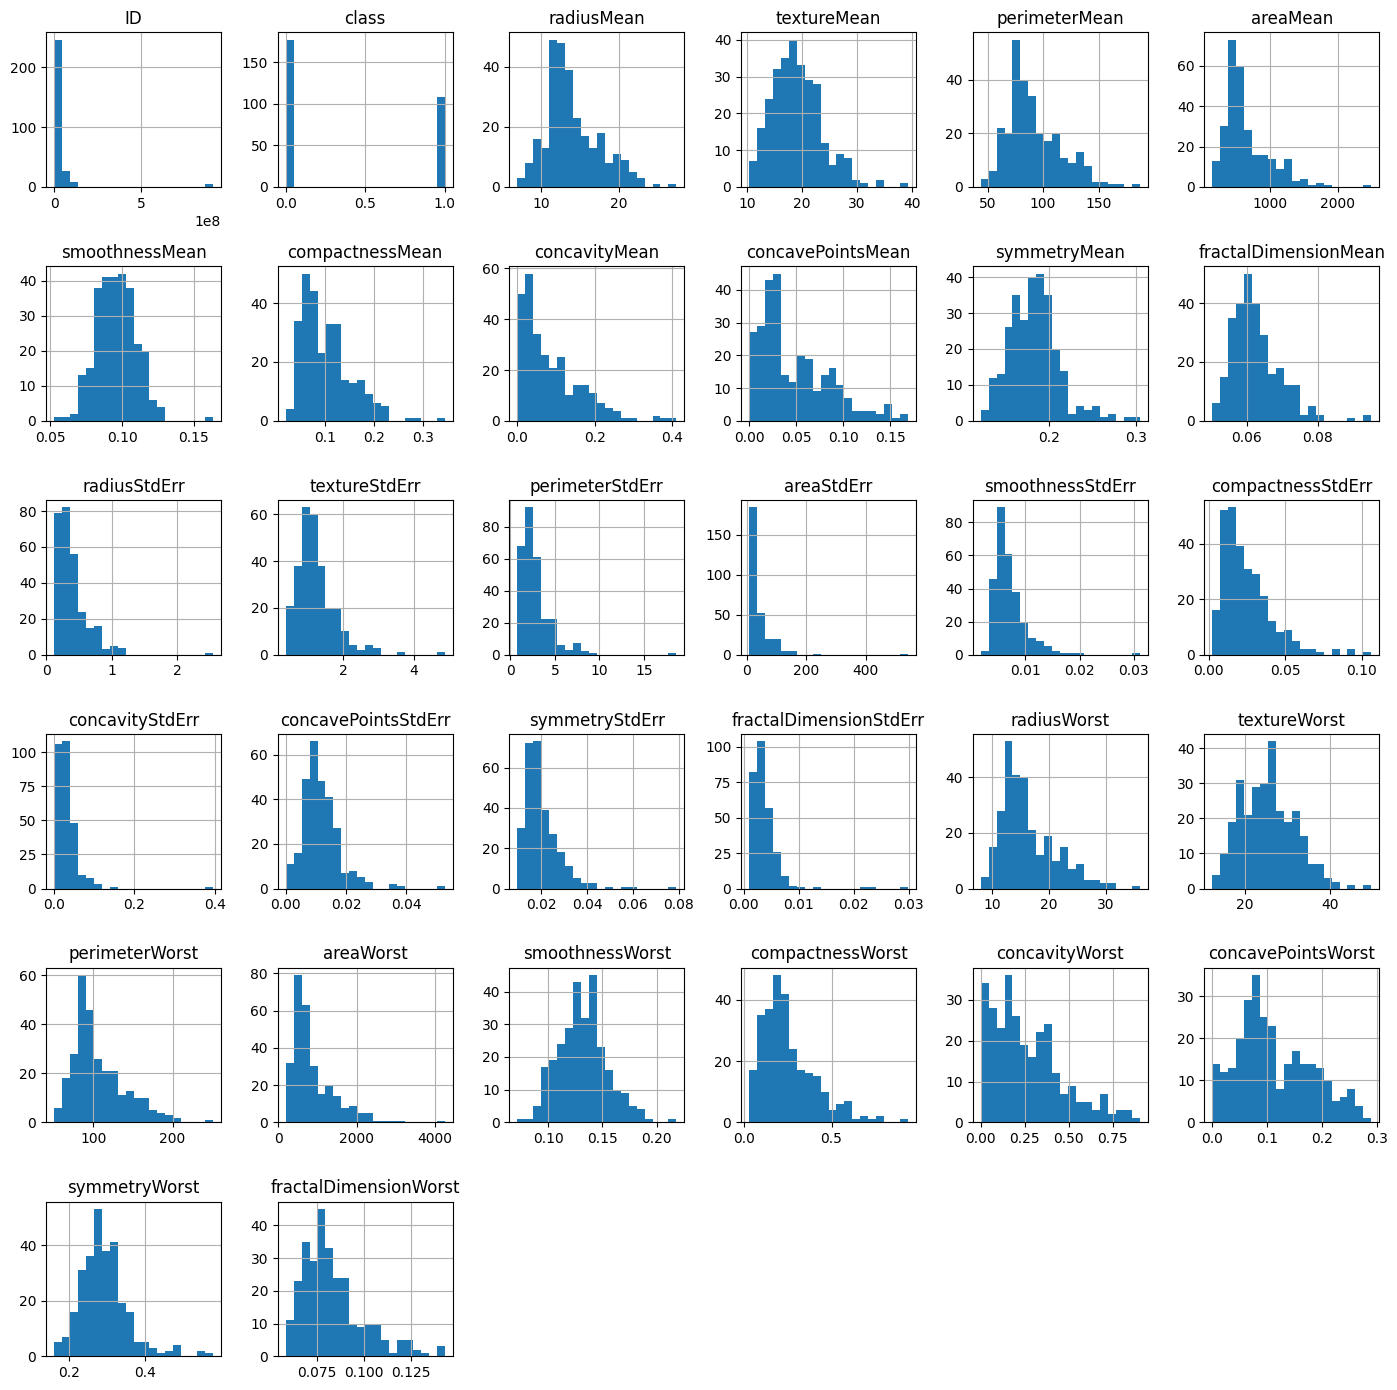

In [142]:
import matplotlib.pyplot as plt
df_train.hist(bins=20, figsize=(14, 14))
plt.tight_layout()
plt.show()

Checking outliers with boxplots

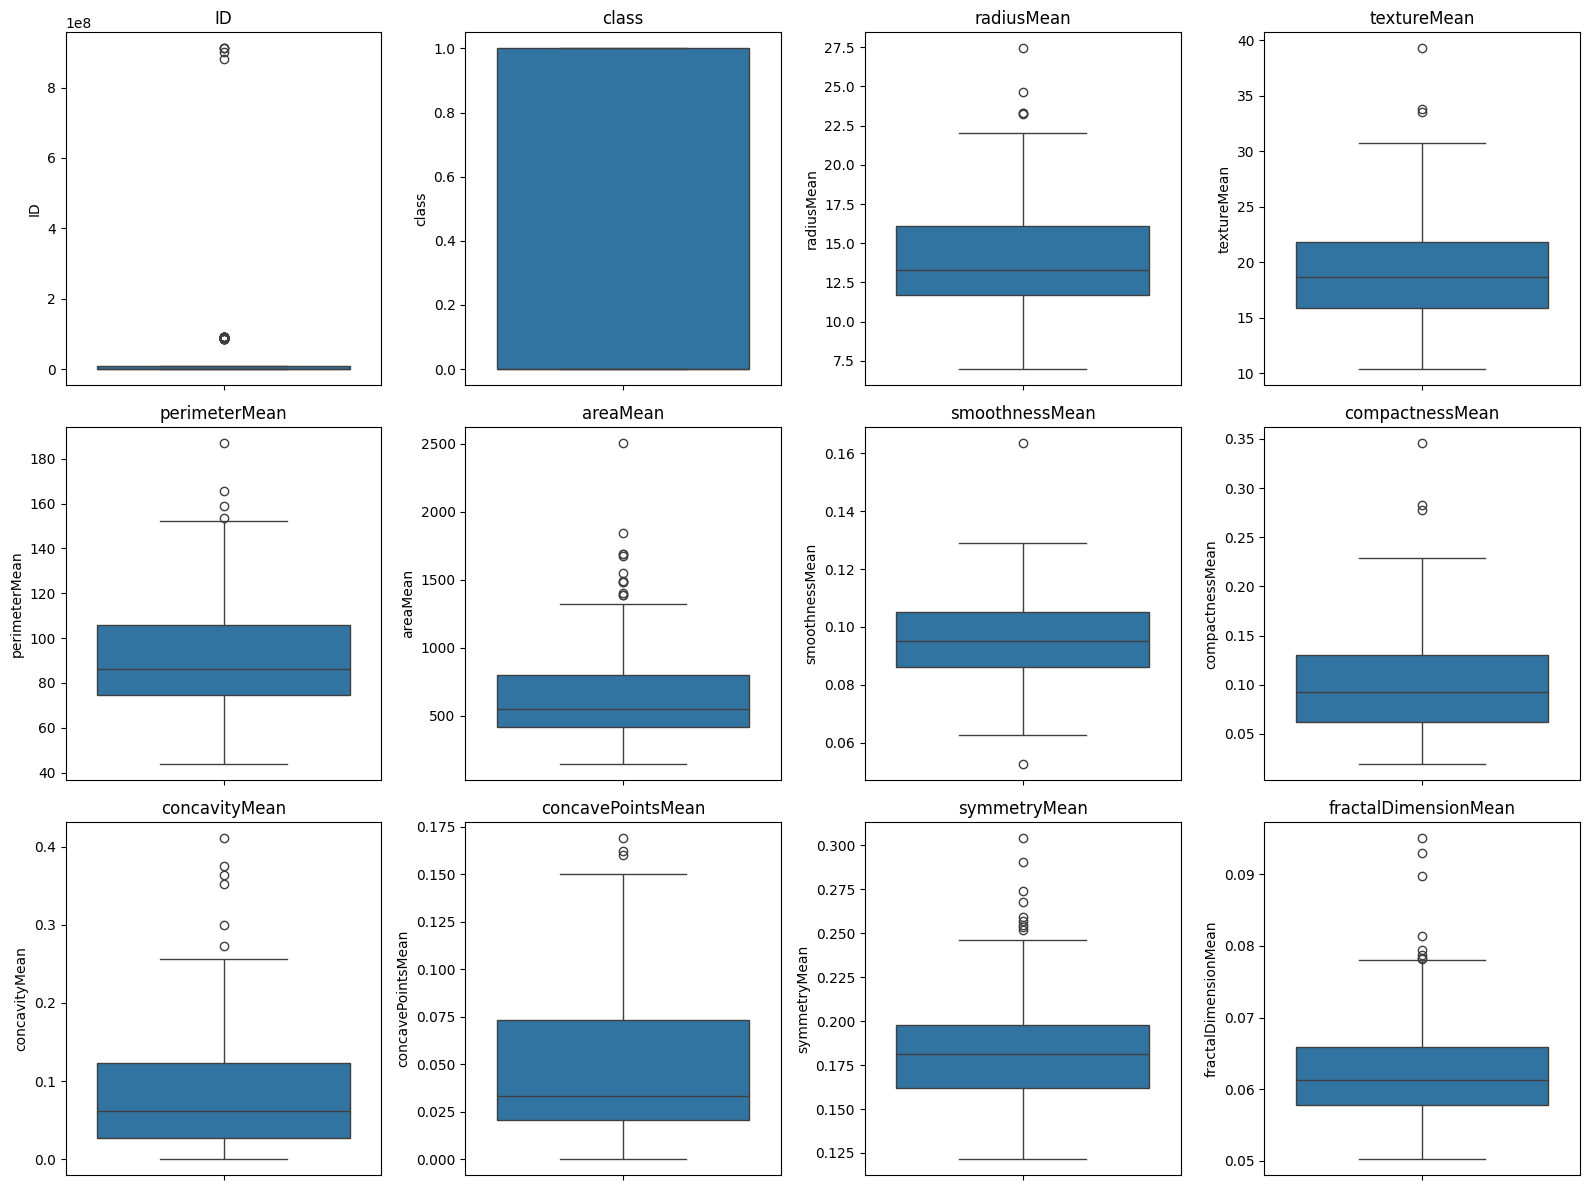

In [143]:
import seaborn as sns

numeric_cols = df_train.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols[:12]):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df_train[col])
    plt.title(col)
plt.tight_layout()
plt.show()


## Outlier handling 
We cap extreme values per numeric feature at [Q1 - 1.5×IQR, Q3 + 1.5×IQR] to reduce the influence of outliers without dropping rows.


In [144]:
import numpy as np
import pandas as pd

def handle_outliers_train(df_encoded, target_col="class"):
    feature_columns = [c for c in df_encoded.columns if c not in [target_col, "ID"]]
    df_wins = df_encoded.copy()
    caps = {}
    capped_counts = {}
    for col in feature_columns:
        q1 = df_wins[col].quantile(0.25)
        q3 = df_wins[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        arr = df_wins[col].to_numpy()
        caps[col] = (lower, upper)
        capped_counts[col] = int(((arr < lower) | (arr > upper)).sum())
        df_wins[col] = np.clip(arr, lower, upper)
    print("\nTotal values capped (train):", int(sum(capped_counts.values())))
    print("Top capped features (train):")
    for k in sorted(capped_counts, key=capped_counts.get, reverse=True)[:10]:
        print(f"  {k}: {capped_counts[k]}")
    return df_wins, caps, feature_columns

def handle_outliers_apply(df_encoded, caps):
    df_wins = df_encoded.copy()
    for col, (lower, upper) in caps.items():
        if col in df_wins.columns:
            arr = df_wins[col].to_numpy()
            df_wins[col] = np.clip(arr, lower, upper)
    return df_wins

train_winsorized, caps, feature_columns = handle_outliers_train(df_train, target_col="class")
test_winsorized = handle_outliers_apply(df_test, caps)



Total values capped (train): 269
Top capped features (train):
  areaStdErr: 31
  smoothnessStdErr: 18
  radiusStdErr: 17
  perimeterStdErr: 16
  concavityStdErr: 13
  symmetryStdErr: 13
  fractalDimensionWorst: 13
  areaMean: 12
  areaWorst: 12
  textureStdErr: 11


## Scaling
We use RobustScaler on features (after capping) to reduce the influence of remaining outliers; it scales by median and IQR.


In [145]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

train_scaled = train_winsorized.copy()
train_scaled[feature_columns] = robust_scaler.fit_transform(train_winsorized[feature_columns])

test_scaled = test_winsorized.copy()
test_scaled[feature_columns] = robust_scaler.transform(test_winsorized[feature_columns])

print("Scaled features shape:", train_scaled[feature_columns].shape)
train_scaled.head()



Scaled features shape: (285, 30)


,ID,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,8813129,0,-0.002283,-0.282828,-0.049807,0.000000,-0.559686,-0.620730,-0.275909,-0.165054,...,0.028053,-0.189331,0.024205,0.039921,-0.131387,-0.465385,-0.144174,-0.030100,-0.484104,-0.177282
1,898678,0,-0.278539,0.033670,-0.303342,-0.266684,-0.590576,-0.503445,-0.568742,-0.469968,...,-0.219472,0.172594,-0.267679,-0.200263,-0.083942,-0.442857,-0.636578,-0.494781,0.056358,0.066879
2,917896,0,0.098174,-0.003367,0.084512,0.064891,0.210471,0.215804,-0.084622,0.086701,...,0.023102,0.023013,0.038206,0.028586,0.412409,0.224176,-0.089233,0.290362,0.011561,0.570064
3,869691,1,-0.337900,-0.356902,-0.228470,-0.301767,0.730890,1.139422,1.085980,0.775754,...,-0.202970,0.101464,-0.139772,-0.152456,0.266423,1.062637,0.858038,0.879193,2.015896,1.243631
4,9110127,1,1.084475,-0.311448,1.008997,1.170140,-0.296859,0.453306,0.491538,0.555492,...,0.892739,-0.354603,0.841955,0.998029,-0.178832,0.279121,0.779130,0.544745,0.001445,0.142251


## Encode the solution file

In [146]:
csv_path_sol = "../../data/breast-cancer-diagnostic.shuf.sol.ex.csv"
df_sol = pd.read_csv(csv_path_sol)

col = df_sol['class']
   
mapping = {True: 1, False: 0, 'true': 1, 'false': 0, 'True': 1, 'False': 0, 1: 1, 0: 0}
df_sol['class'] = col.map(mapping)



## Persist preprocessed data with joblib
We save the processed dataframe for reuse in other notebooks.


In [147]:
output_path_train = "../../data/processed/breast-cancer-preprocessed-train.csv"
train_scaled.to_csv(output_path_train, index=False)

output_path_test= "../../data/processed//breast-cancer-preprocessed-test.csv"
test_scaled.to_csv(output_path_test, index=False)

output_path_sol= "../../data/processed//breast-cancer-preprocessed-sol.csv"
df_sol.to_csv(output_path_sol, index=False)

